In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt


In [18]:
def smooth(scalars: list[float], weight: float) -> list[float]:
    last = 0
    smoothed = []
    num_acc = 0
    for next_val in scalars:
        last = last * weight + (1 - weight) * next_val
        num_acc += 1
        debias_weight = 1
        if weight != 1:
            debias_weight = 1 - math.pow(weight, num_acc)
        smoothed_val = last / debias_weight
        smoothed.append(smoothed_val)

    return smoothed

In [27]:
# Global Variables
MODEL_NAMES = ['a2c', 'acer', 'dqn', 'ppo', 'acer_lstm', 'a2c_lstm']
CONVERSION_DICT = {
    'a2c': 'A2C',
    'acer': 'ACER',
    'dqn': 'DQN',
    'ppo': 'PPO',
    'acer_lstm': 'ACER (LSTM)',
    'a2c_lstm': 'A2C (LSTM)'
}

COLORS = [
    '#D02b00', # Red
    '#f58231', # Orange
    '#772F02', # Brown
    '#911eb4', # Purple
    '#3cb44b', # Green
    '#5FACFF' # Blue
]

COLORS2 = [
    '#D02b00', # Red
    '#f58231', # Orange
    '#911eb4', # Purple
    '#3cb44b', # Green
    '#5FACFF' # Blue
]


COLOR_PAL = sns.color_palette(COLORS)
COLOR_PAL2 = sns.color_palette(COLORS2)

In [20]:
MODEL_NAMES = ['a2c', 'acer', 'dqn', 'ppo', 'acer_lstm', 'a2c_lstm']

def get_episode_reward_df(fig: str) -> pd.DataFrame:
    df_list = []
    for model in MODEL_NAMES:
        try:
            df = pd.read_csv(f'../output/tensor_board_info/{model}_stats/{model}_{fig}.csv')
            df['Episode Reward'] = smooth(df['Value'], 0.990)
            df['Model'] = CONVERSION_DICT[model]
            df['Steps in Millions'] = df['Step'] / 1000000
            df_list.append(df)
        except:
            continue
        
    data = pd.concat(df_list)
    data.reset_index(drop=True, inplace=True)
    return data


# Episode Reward

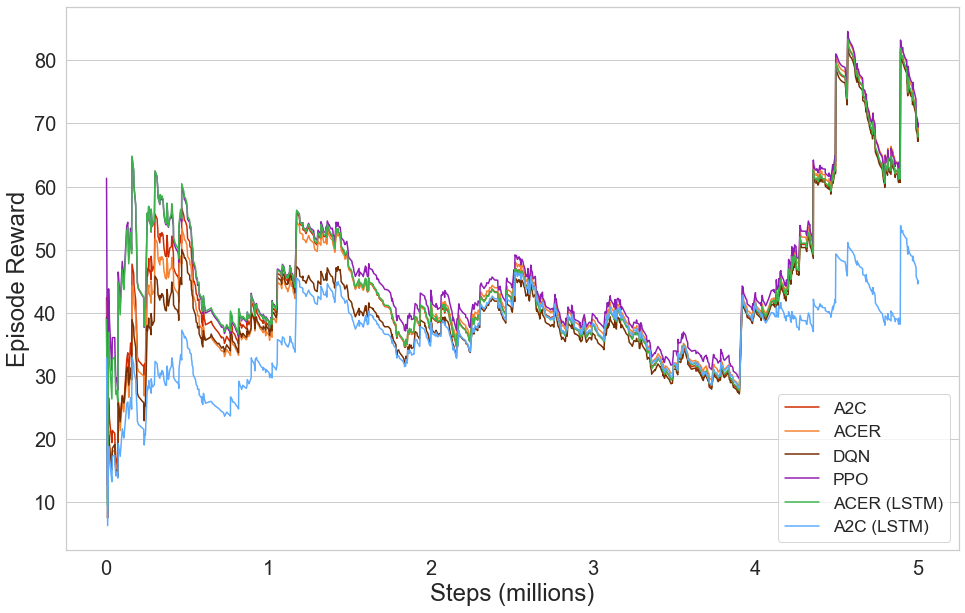

In [21]:
data = get_episode_reward_df('ep_rew')
sns.set(rc={'figure.figsize':(16,10)})
sns.set_theme(style="whitegrid", palette='pastel')
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)
plt.xlabel('Steps (millions)', fontsize=24)
plt.ylabel("Episode Reward", fontsize=24)
plt.tick_params(labelsize=20)
sns.lineplot(data=data, x="Steps in Millions", y="Episode Reward", hue="Model", palette=COLOR_PAL)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.savefig('../output/figures/rewards/episode_reward.png', dpi=300, bbox_inches='tight')

# Loss

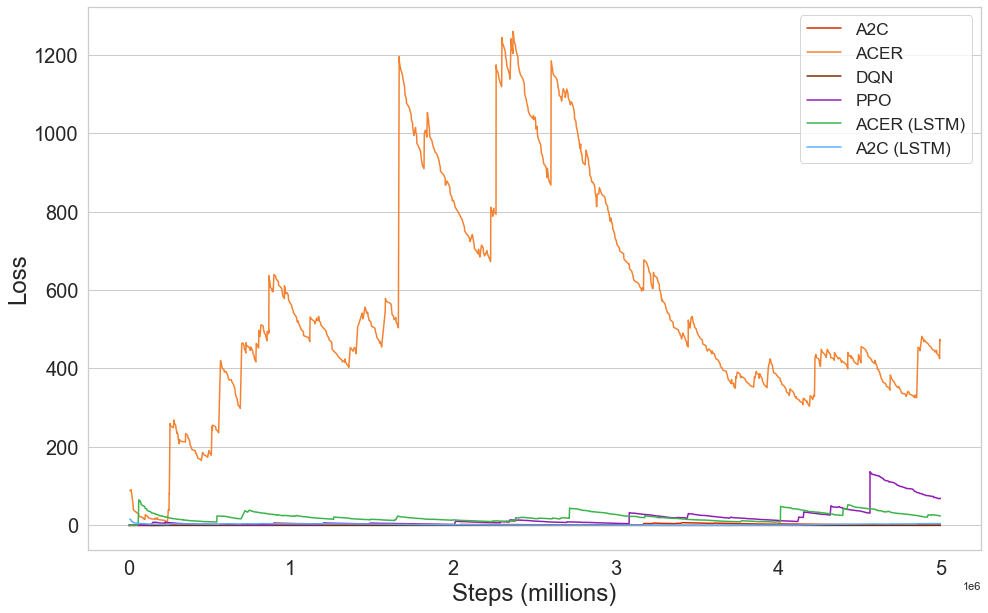

In [22]:
data = get_episode_reward_df('loss')
sns.set(rc={'figure.figsize':(16,10)})
sns.set_theme(style="whitegrid", palette="pastel")
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)

sns.lineplot(data=data, x="Step", y="Episode Reward", hue="Model", palette=COLOR_PAL)
plt.xlabel('Steps (millions)', fontsize=24)
plt.ylabel("Loss", fontsize=24)
sns.axes_style("whitegrid")
plt.legend(title_fontsize='40', fontsize='x-large',)
plt.tick_params(labelsize=20)

plt.savefig('../output/figures/loss.png', dpi=300, bbox_inches='tight')

# Rewards

ValueError: The palette list has the wrong number of colors.

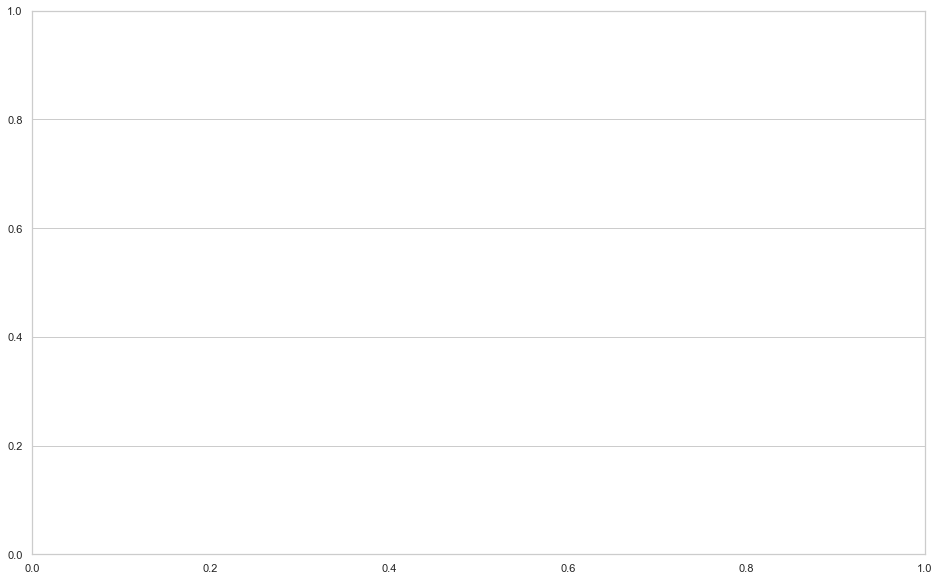

In [28]:
data = get_episode_reward_df('rew')
sns.set(rc={'figure.figsize':(16,10)})
sns.set_theme(style="whitegrid", palette="pastel")
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)

sns.lineplot(data=data, x="Step", y="Episode Reward", hue="Model", palette=COLOR_PAL2)

plt.xlabel('Steps (millions)', fontsize=24)
plt.ylabel("Rewards", fontsize=24)

sns.axes_style("whitegrid")
plt.legend(title_fontsize='40', fontsize='x-large',)
plt.tick_params(labelsize=20)
plt.savefig('../output/figures/rewards.png', dpi=300, bbox_inches='tight')

# Entropy Loss

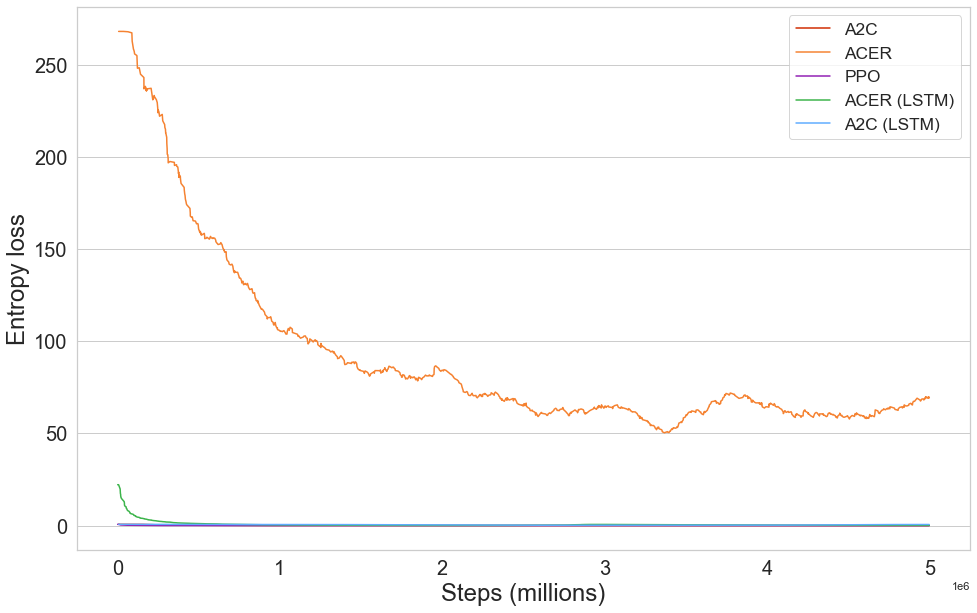

In [29]:
data = get_episode_reward_df('ent_loss')
sns.set(rc={'figure.figsize':(16,10)})
sns.set_theme(style="whitegrid", palette="pastel")
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)

sns.lineplot(data=data, x="Step", y="Episode Reward", hue="Model", palette=COLOR_PAL2)

plt.xlabel('Steps (millions)', fontsize=24)
plt.ylabel("Entropy loss", fontsize=24)
sns.axes_style("whitegrid")
plt.legend(title_fontsize='40', fontsize='x-large',)
plt.tick_params(labelsize=20)

plt.savefig('../output/figures/entropy_loss.png', dpi=300, bbox_inches='tight')

# Policy Gradient Loss

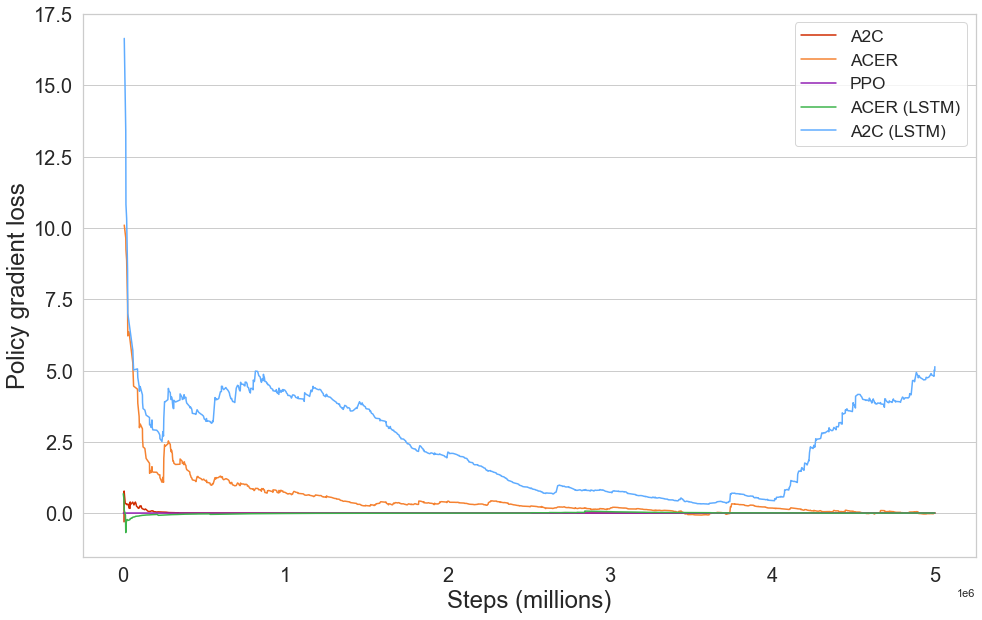

In [30]:
data = get_episode_reward_df('pg_loss')

sns.set(rc={'figure.figsize':(16,10)})
sns.set_theme(style="whitegrid", palette="pastel")
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)

sns.lineplot(data=data, x="Step", y="Episode Reward", hue="Model", palette=COLOR_PAL2)

plt.xlabel('Steps (millions)', fontsize=24)
plt.ylabel("Policy gradient loss", fontsize=24)
sns.axes_style("whitegrid")
plt.legend(title_fontsize='40', fontsize='x-large',)
plt.tick_params(labelsize=20)

plt.savefig('../output/figures/policy_gradient_loss.png', dpi=300, bbox_inches='tight')

# Value Function Loss

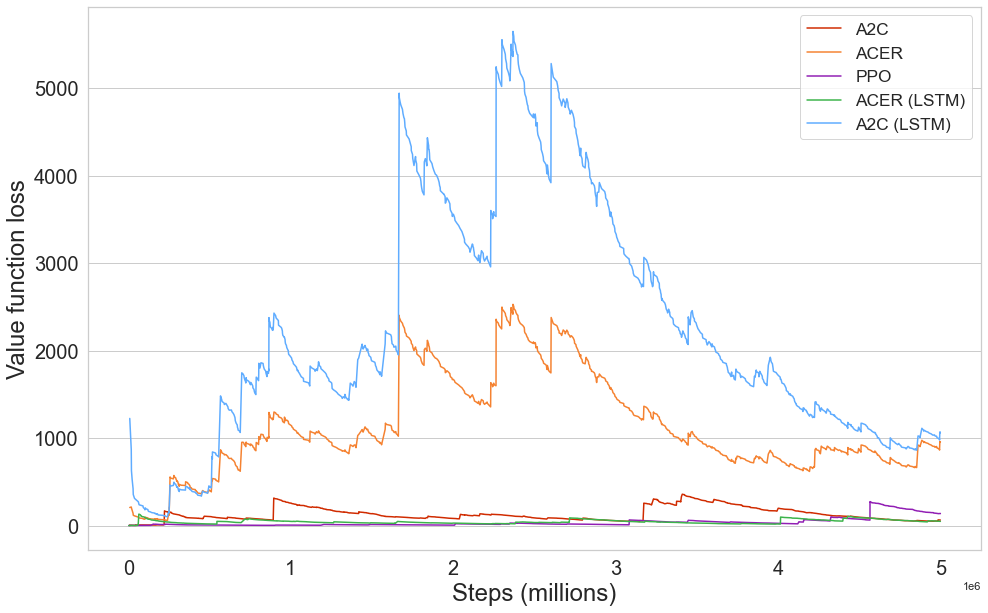

In [31]:
data = get_episode_reward_df('vf_loss')
sns.set(rc={'figure.figsize':(16,10)})
sns.set_theme(style="whitegrid", palette="pastel")
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)

sns.lineplot(data=data, x="Step", y="Episode Reward", hue="Model", palette=COLOR_PAL2)

plt.xlabel('Steps (millions)', fontsize=24)
plt.ylabel("Value function loss", fontsize=24)
sns.axes_style("whitegrid")
plt.legend(title_fontsize='40', fontsize='x-large',)
plt.tick_params(labelsize=20)

plt.savefig('../output/figures/value_function_loss.png', dpi=300, bbox_inches='tight')

# Advantage

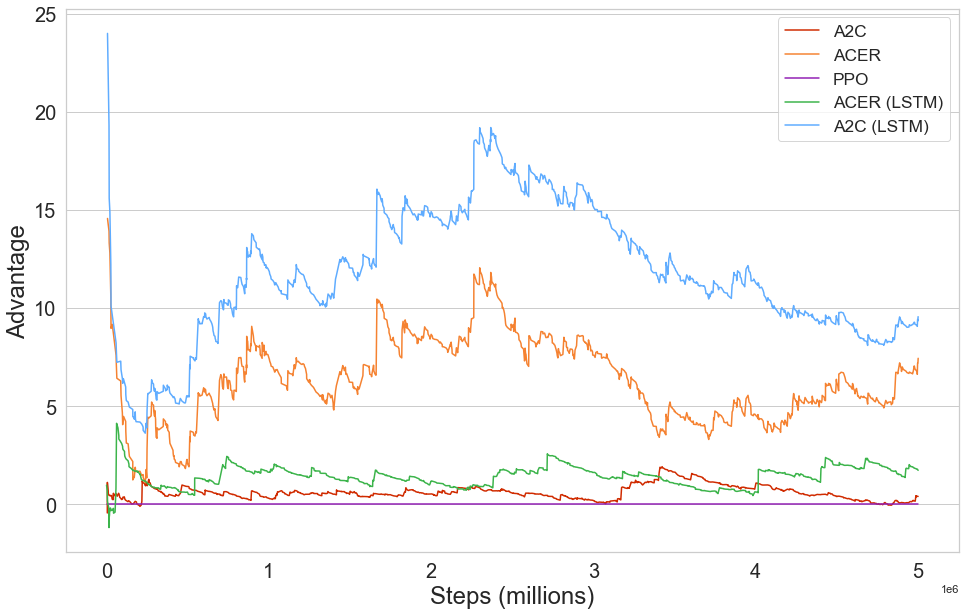

In [32]:
data = get_episode_reward_df('adv')
sns.set(rc={'figure.figsize':(16,10)})
sns.set_theme(style="whitegrid", palette="pastel")
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)

sns.lineplot(data=data, x="Step", y="Episode Reward", hue="Model", palette=COLOR_PAL2)

plt.xlabel('Steps (millions)', fontsize=24)
plt.ylabel("Advantage", fontsize=24)
sns.axes_style("whitegrid")
plt.legend(title_fontsize='40', fontsize='x-large',)
plt.tick_params(labelsize=20)

plt.savefig('../output/figures/advantage.png', dpi=300, bbox_inches='tight')

In [ ]:
data = get_episode_reward_df('ep_rew')
sns.set(rc={'figure.figsize':(16,10)})
sns.set_theme(style="whitegrid", palette='pastel')
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(False)
plt.xlabel('Steps (millions)', fontsize=22)
plt.ylabel("Episode Reward", fontsize=22)
plt.tick_params(labelsize=18)
sns.lineplot(data=data, x="Steps in Millions", y="Episode Reward", hue="Model")
plt.legend(fontsize='x-large', title_fontsize='40')
plt.savefig('output/figures/rewards/episode_reward.png', dpi=300, bbox_inches='tight')